In [68]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [69]:
# Load dataset
file_path = "weather_forecast_2022_2024_100k.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [70]:
# Check for missing values
print("Missing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 forecast_time        0
temperature          0
humidity             0
wind_speed           0
wind_direction       0
pressure             0
precipitation        0
cloud_coverage       0
weather_condition    0
dtype: int64


In [71]:
# Drop rows with missing values (if any)
df = df.dropna()


In [72]:
# Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 forecast_time         object
temperature          float64
humidity             float64
wind_speed           float64
wind_direction       float64
pressure             float64
precipitation        float64
cloud_coverage       float64
weather_condition     object
dtype: object


In [73]:
# Convert to datetime
df['forecast_time'] = pd.to_datetime(df['forecast_time'])

# # Extract useful time-based features
# df['hour'] = df['forecast_time'].dt.hour
# df['day_of_week'] = df['forecast_time'].dt.dayofweek
df['month'] = df['forecast_time'].dt.month

In [74]:
# Add binary indicator for whether precipitation occurred
df['has_precipitation'] = df['precipitation'] > 0

In [75]:
# Get summary stats of numerical features
print(df.describe())

             forecast_time   temperature      humidity    wind_speed  \
count                26304  26304.000000  26304.000000  26304.000000   
mean   2023-07-02 23:30:00     15.004530     69.982552      4.607841   
min    2022-01-01 00:00:00     -2.595747     33.747196      3.000073   
25%    2022-10-01 23:45:00      8.247420     56.586278      3.647326   
50%    2023-07-02 23:30:00     14.975397     69.779654      4.363372   
75%    2024-04-01 23:15:00     21.755076     83.381653      5.318527   
max    2024-12-31 23:00:00     32.040769    100.000000     11.925937   
std                    NaN      7.352788     15.025880      1.208269   

       wind_direction      pressure  precipitation  cloud_coverage  \
count    26304.000000  26304.000000   26304.000000    26304.000000   
mean       179.489576   1010.008569       0.294343       40.241279   
min          0.009911    998.002003       0.000000       15.600000   
25%         88.947741   1008.007434       0.000000       31.800000   
5

In [76]:
# Value counts for weather conditions
print(df['weather_condition'].value_counts())


weather_condition
clear     14241
rainy     10548
cloudy     1510
windy         5
Name: count, dtype: int64


In [77]:
df.head()

,forecast_time,temperature,humidity,wind_speed,wind_direction,pressure,precipitation,cloud_coverage,weather_condition,month,has_precipitation
0,2022-01-01 00:00:00,15.993428,90.124617,5.429465,223.713616,1011.603226,0.0,51.7,cloudy,1,False
1,2022-01-01 01:00:00,14.747359,94.099472,4.830542,243.206965,1008.126983,0.0,54.6,cloudy,1,False
2,2022-01-01 02:00:00,16.343152,87.596470,6.286963,145.135328,1005.557377,0.5,48.1,rainy,1,True
3,2022-01-01 03:00:00,18.117722,94.614785,3.643288,301.252915,1009.596029,0.1,52.8,rainy,1,True
4,2022-01-01 04:00:00,14.627243,94.475663,5.416010,332.605324,1009.729219,0.0,54.3,cloudy,1,False


In [78]:
df.dtypes

forecast_time        datetime64[ns]
temperature                 float64
humidity                    float64
wind_speed                  float64
wind_direction              float64
pressure                    float64
precipitation               float64
cloud_coverage              float64
weather_condition            object
month                         int32
has_precipitation              bool
dtype: object

In [79]:
df.shape

(26304, 11)

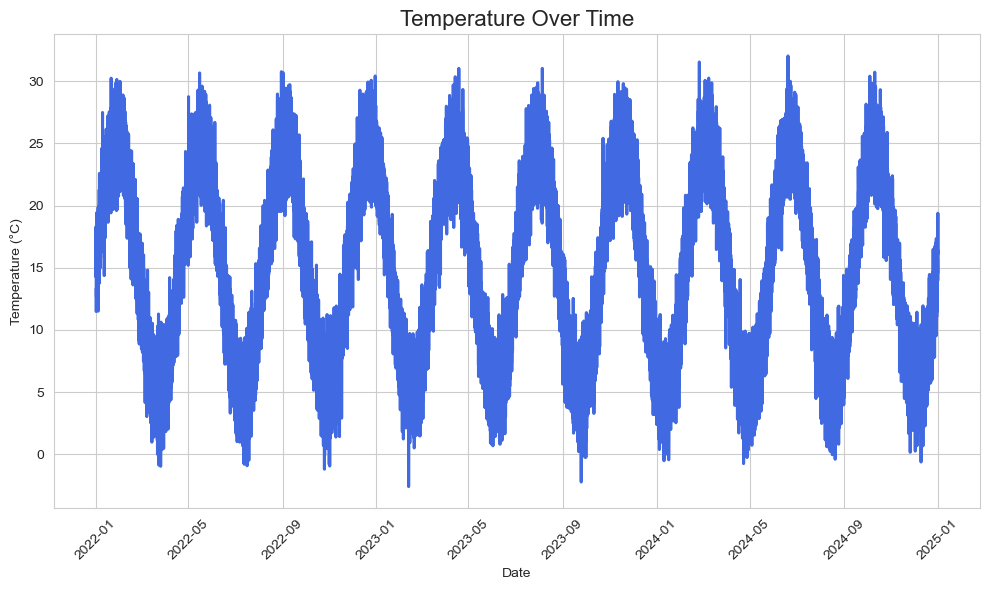

In [80]:
# Temperature Trends Over Time

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x='forecast_time', y='temperature', data=df, color='royalblue', linewidth=2.2)
plt.title('Temperature Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

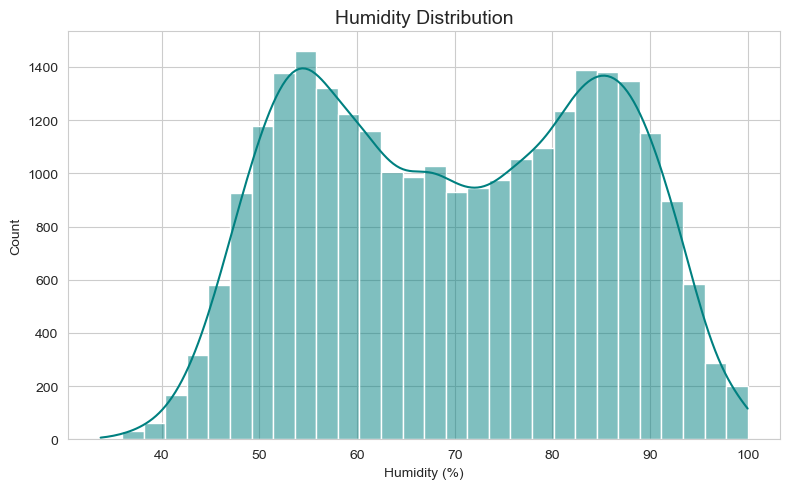

In [81]:
# Humidity Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['humidity'], kde=True, bins=30, color='teal')
plt.title('Humidity Distribution', fontsize=14)
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
df.head(3)

,forecast_time,temperature,humidity,wind_speed,wind_direction,pressure,precipitation,cloud_coverage,weather_condition,month,has_precipitation
0,2022-01-01 00:00:00,15.993428,90.124617,5.429465,223.713616,1011.603226,0.0,51.7,cloudy,1,False
1,2022-01-01 01:00:00,14.747359,94.099472,4.830542,243.206965,1008.126983,0.0,54.6,cloudy,1,False
2,2022-01-01 02:00:00,16.343152,87.596470,6.286963,145.135328,1005.557377,0.5,48.1,rainy,1,True


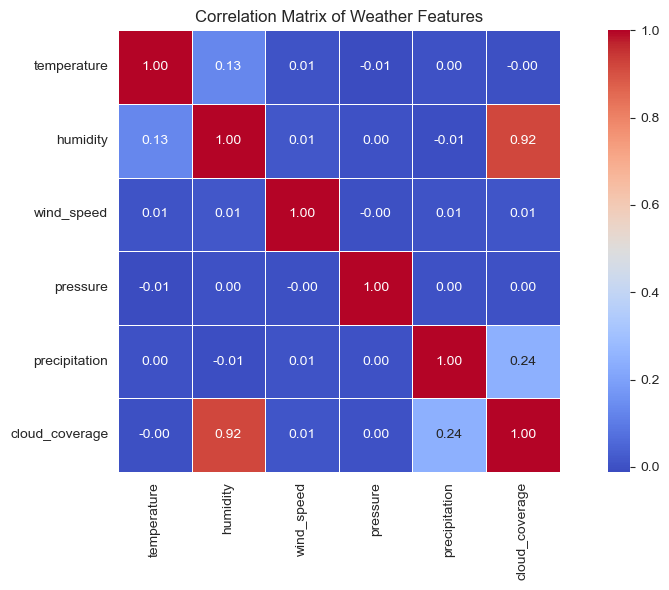

In [83]:
# Correlation Heatmap of Features

numeric_cols = ['temperature', 'humidity', 'wind_speed', 'pressure', 'precipitation', 'cloud_coverage']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Matrix of Weather Features')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

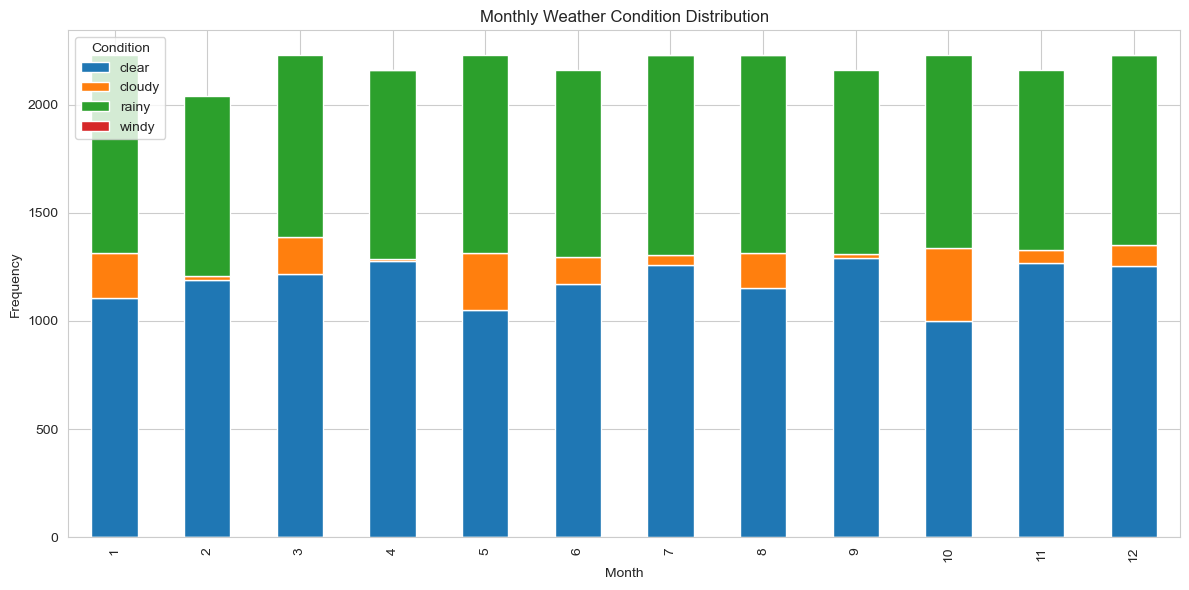

In [51]:
#  Monthly Weather Condition Trends

monthly_weather = df.groupby(['month', 'weather_condition']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
monthly_weather.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Weather Condition Distribution')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Condition')
plt.tight_layout()
plt.show()